In [1]:
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

In [2]:
!pip install import-ipynb

You should consider upgrading via the 'python -m pip install --upgrade pip' command.



  Running setup.py install for import-ipynb: started
    Running setup.py install for import-ipynb: finished with status 'done'


In [1]:
import import_ipynb

In [2]:
# %cd /content/drive/MyDrive/A62_projet_synthese_feature/feature-colab-from-git/notebook

In [3]:
%run iteration_0_imports.py

In [4]:
%run iteration_0_parameters.py

In [5]:
import iteration_0_utils as utils

importing Jupyter notebook from iteration_0_utils.ipynb


In [6]:
%whos

Variable           Type      Data/Info
--------------------------------------
HEALTHY            str       H
IMG_IN_COLOR       int       1
IMG_SIZE           int       64
Image              module    <module 'PIL.Image' from <...>packages\\PIL\\Image.py'>
NBR_SAMPLE         int       20000
PATH_DATA          str       ../data
PATH_DATA_EDA      str       ../data/eda
PATH_DATA_LIST     str       ../data/list
PATH_DATA_SAMPLE   str       ../data/sample
PATH_MODEL         str       ../model
PATH_ROOT          str       ..
PATH_SOURCE_IMG    str       ../cell_images
SICK               str       S
cv2                module    <module 'cv2' from 'C:\\U<...>kages\\cv2\\__init__.py'>
datetime           type      <class 'datetime.datetime'>
glob               module    <module 'glob' from 'C:\\<...>anaconda3\\lib\\glob.py'>
gzip               module    <module 'gzip' from 'C:\\<...>anaconda3\\lib\\gzip.py'>
import_ipynb       module    <module 'import_ipynb' fr<...>ckages\\import_ipynb.py'>
np

In [7]:
PATH_DATA_LIST

'../data/list'

In [8]:
df_path_img_sick = pd.read_csv(PATH_DATA_LIST + "/" + "df_list_path_sick_img.csv")
df_path_img_healthy = pd.read_csv(PATH_DATA_LIST + "/" + "df_list_path_healthy_img.csv")
df_path_img = pd.read_csv(PATH_DATA_LIST + "/" + "df_list_path_img.csv")

## Image moyenne par classe 

In [11]:
# get array from image
def img_mean(df_path_img):
    img_arr_sum = np.zeros((400,400,3))
    for path_img, _ in zip(df_path_img.path_img, tqdm(range(len(df_path_img.path_img)))):
        img_arr = cv2.imread(path_img, flags = IMG_IN_COLOR)

        img_arr_sum[:img_arr.shape[0],:img_arr.shape[1],:] += img_arr 
    
    return img_arr_sum / df_path_img.shape[0]
            

In [12]:
img_mean_healthy =  img_mean(df_path_img_healthy)

100%|██████████████████████████████████████████████████████████████████████████▉| 13778/13779 [01:42<00:00, 134.48it/s]


In [13]:
img_mean_sick =  img_mean(df_path_img_sick)

100%|██████████████████████████████████████████████████████████████████████████▉| 13778/13779 [02:04<00:00, 110.31it/s]


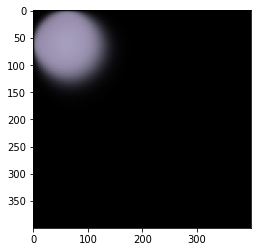

In [14]:
plt.imshow(img_mean_healthy.astype(np.uint8))

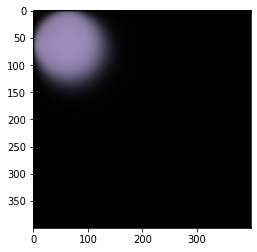

In [15]:
plt.imshow(img_mean_sick.astype(np.uint8))

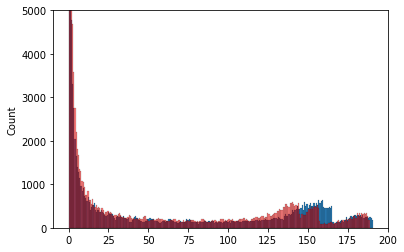

In [16]:
sns.histplot(img_mean_healthy.ravel(), bins = 256, alpha = 0.95)
sns.histplot(img_mean_sick.ravel(), bins = 256, color = "r",alpha = 0.5)
plt.ylim(0,5000)
plt.show()

In [17]:
PATH_DATA_EDA

'../data/eda'

In [18]:
os.makedirs(PATH_DATA_EDA, exist_ok=True)

In [19]:
# https://www.thoughtco.com/using-pickle-to-save-objects-2813661
utils.pickle_save(img_mean_healthy, PATH_DATA_EDA + "/" + "img_mean_healthy.pklz")
utils.pickle_save(img_mean_sick, PATH_DATA_EDA + "/" + "img_mean_sick.pklz")

## Histogramme des pixels non nuls pour chaque image et par classe

In [10]:
DF_PIXEL_COUNT_ID_COL = 0
DF_PIXEL_COUNT_ZERO_COL = 1
DF_PIXEL_COUNT_NON_ZERO_COL = 2
DF_PIXEL_COUNT_TOTAL_COL = 3

def pixel_count(df_path_img: pd.DataFrame, threshold: float) -> np.array:
    result = np.zeros((len(df_path_img.path_img),4))
    for i, path_img in enumerate(tqdm(df_path_img.path_img)):
        img_arr = cv2.imread(path_img, flags = IMG_IN_COLOR)
        result[i,DF_PIXEL_COUNT_ID_COL] = i
        result[i,DF_PIXEL_COUNT_ZERO_COL] = np.count_nonzero(img_arr <= threshold)
        result[i,DF_PIXEL_COUNT_NON_ZERO_COL] = np.count_nonzero(img_arr > threshold)
        result[i,DF_PIXEL_COUNT_TOTAL_COL] = len(img_arr.ravel())

    return result

### Seuil 0

In [11]:
def plot_pixel_count(df_path_img_healthy: pd.DataFrame, df_path_img_sick: pd.DataFrame, threshold: float):
    pixel_count_healthy = pixel_count(df_path_img_healthy, threshold)
    pixel_count_sick = pixel_count(df_path_img_sick, threshold)
    # make dataframe
    df_pixel_count_healthy = pd.DataFrame(pixel_count_healthy, columns=["id", "zeros", "non_zeros", "total"])
    df_pixel_count_healthy["label"] = "healthy"
    df_pixel_count_sick = pd.DataFrame(pixel_count_sick, columns=["id", "zeros", "non_zeros", "total"])
    df_pixel_count_sick["label"] = "sick"
    df_pixel_count = pd.concat([df_pixel_count_healthy, df_pixel_count_sick], ignore_index = True)
    # plot count
    print("Count non_zeros:", threshold)
    sns.displot(data = df_pixel_count, x = df_pixel_count["non_zeros"], kde = True, hue = "label", aspect=2.5, height=6)
    plt.show()
    print("Count pct")
    df_pixel_count["pct"] = df_pixel_count["non_zeros"] / df_pixel_count["total"]
    display(df_pixel_count.describe())
    sns.displot(data = df_pixel_count, x = df_pixel_count["pct"], kde = True, hue = "label", aspect=2.5, height=6)
    plt.show()

100%|██████████| 13779/13779 [03:26<00:00, 66.68it/s] 


Count non_zeros: 0.0


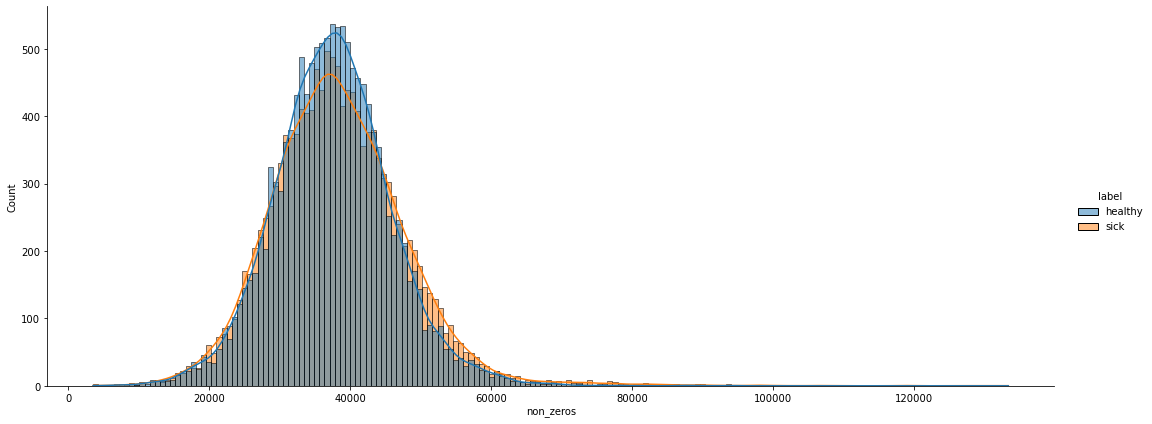

Count pct


,id,zeros,non_zeros,total,pct
count,27558.00000,27558.000000,27558.000000,27558.000000,27558.000000
mean,6889.00000,15567.353473,37939.915632,53507.269105,0.716275
std,3977.72684,7553.929749,8987.182130,14902.714162,0.060674
min,0.00000,2079.000000,3549.000000,6600.000000,0.299869
25%,3444.25000,11286.000000,32160.000000,44202.000000,0.692130
50%,6889.00000,13915.500000,37596.000000,51870.000000,0.730053
75%,10333.75000,17550.000000,43212.000000,60465.000000,0.756611
max,13778.00000,237918.000000,133362.000000,371280.000000,0.862702


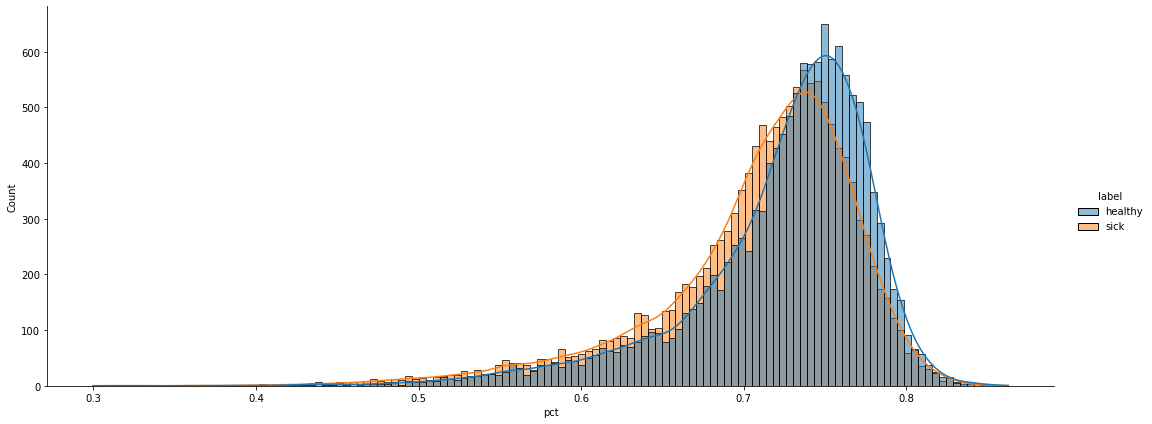

In [12]:
plot_pixel_count(df_path_img_healthy, df_path_img_sick, 0.0)

### seuil 10 - 50

100%|██████████| 13779/13779 [00:18<00:00, 732.20it/s]


Count non_zeros: 10


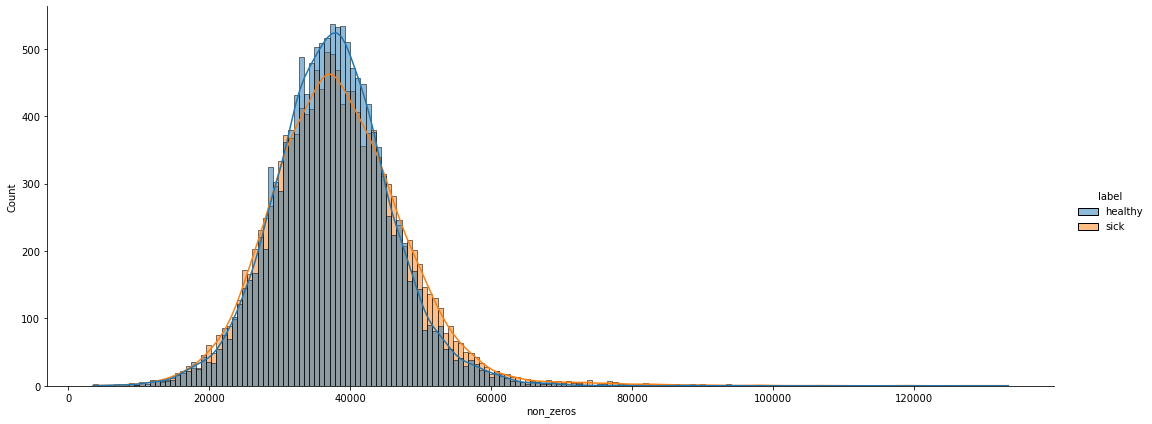

Count pct


,id,zeros,non_zeros,total,pct
count,27558.00000,27558.000000,27558.000000,27558.000000,27558.000000
mean,6889.00000,15569.456419,37937.812686,53507.269105,0.716237
std,3977.72684,7554.627766,8986.574051,14902.714162,0.060678
min,0.00000,2079.000000,3549.000000,6600.000000,0.299862
25%,3444.25000,11289.000000,32160.000000,44202.000000,0.692052
50%,6889.00000,13923.000000,37595.000000,51870.000000,0.730005
75%,10333.75000,17553.750000,43212.000000,60465.000000,0.756574
max,13778.00000,237918.000000,133362.000000,371280.000000,0.862702


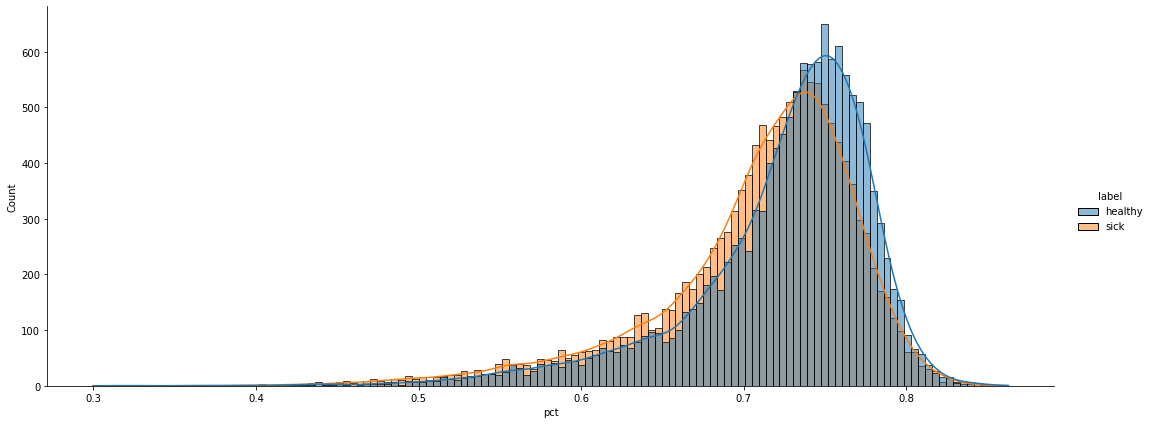

100%|██████████| 13779/13779 [00:17<00:00, 767.39it/s]


Count non_zeros: 20


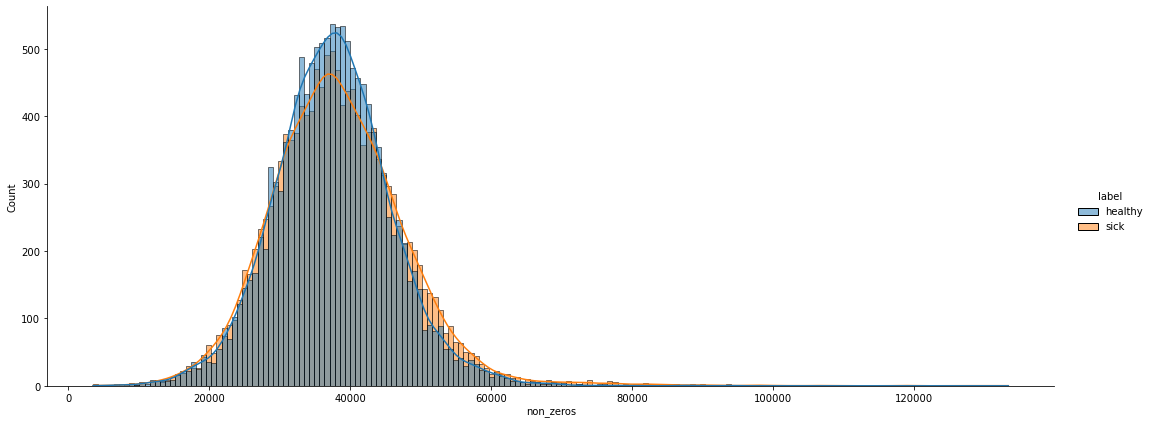

Count pct


,id,zeros,non_zeros,total,pct
count,27558.00000,27558.000000,27558.000000,27558.000000,27558.000000
mean,6889.00000,15573.882285,37933.386821,53507.269105,0.716154
std,3977.72684,7555.869218,8985.624551,14902.714162,0.060688
min,0.00000,2079.000000,3549.000000,6600.000000,0.299830
25%,3444.25000,11300.250000,32154.250000,44202.000000,0.691945
50%,6889.00000,13923.000000,37587.000000,51870.000000,0.729936
75%,10333.75000,17559.750000,43203.000000,60465.000000,0.756465
max,13778.00000,237918.000000,133362.000000,371280.000000,0.862702


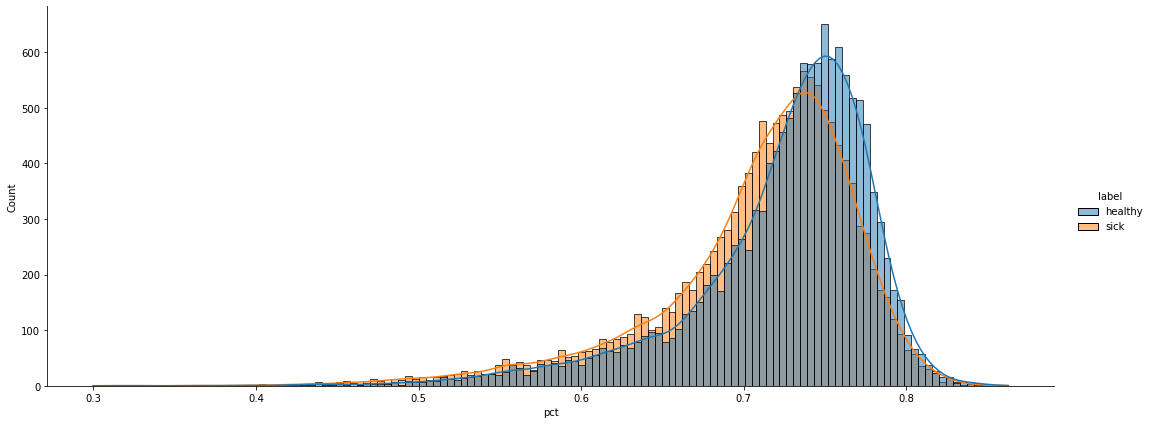

100%|██████████| 13779/13779 [00:18<00:00, 744.37it/s]


Count non_zeros: 30


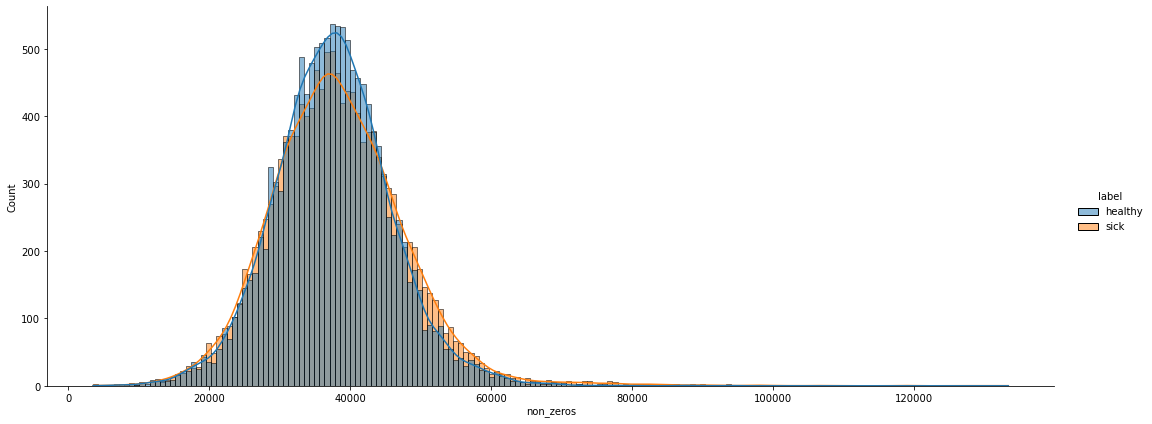

Count pct


,id,zeros,non_zeros,total,pct
count,27558.00000,27558.000000,27558.000000,27558.000000,27558.000000
mean,6889.00000,15580.515132,37926.753973,53507.269105,0.716027
std,3977.72684,7557.301498,8984.565151,14902.714162,0.060700
min,0.00000,2079.000000,3549.000000,6600.000000,0.299774
25%,3444.25000,11304.000000,32151.000000,44202.000000,0.691801
50%,6889.00000,13932.000000,37587.000000,51870.000000,0.729806
75%,10333.75000,17569.750000,43194.000000,60465.000000,0.756391
max,13778.00000,237918.000000,133362.000000,371280.000000,0.862702


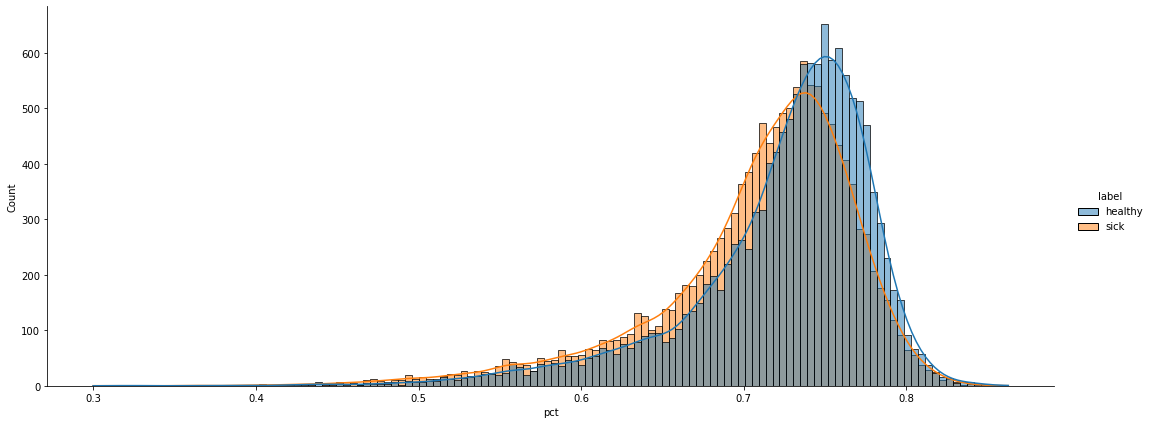

100%|██████████| 13779/13779 [00:18<00:00, 738.27it/s]


Count non_zeros: 40


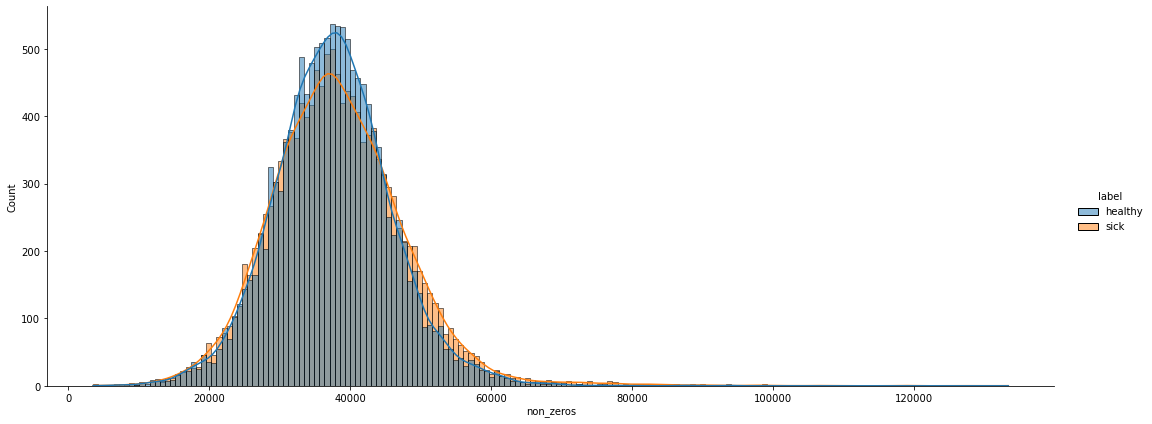

Count pct


,id,zeros,non_zeros,total,pct
count,27558.00000,27558.000000,27558.000000,27558.000000,27558.000000
mean,6889.00000,15589.522353,37917.746752,53507.269105,0.715853
std,3977.72684,7558.973847,8983.601364,14902.714162,0.060716
min,0.00000,2079.000000,3549.000000,6600.000000,0.299711
25%,3444.25000,11313.000000,32148.750000,44202.000000,0.691640
50%,6889.00000,13941.000000,37578.000000,51870.000000,0.729657
75%,10333.75000,17580.750000,43185.000000,60465.000000,0.756211
max,13778.00000,237919.000000,133361.000000,371280.000000,0.862702


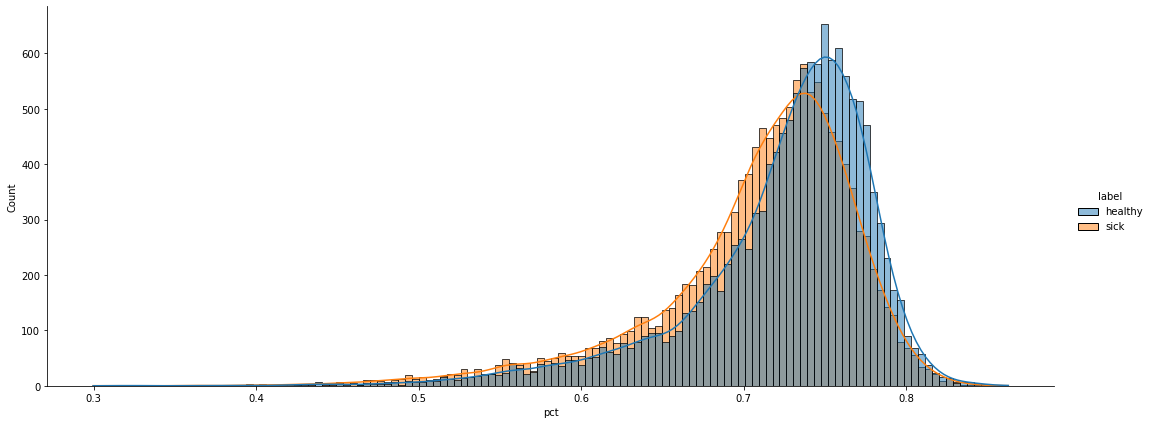

100%|██████████| 13779/13779 [00:18<00:00, 753.90it/s]


Count non_zeros: 50


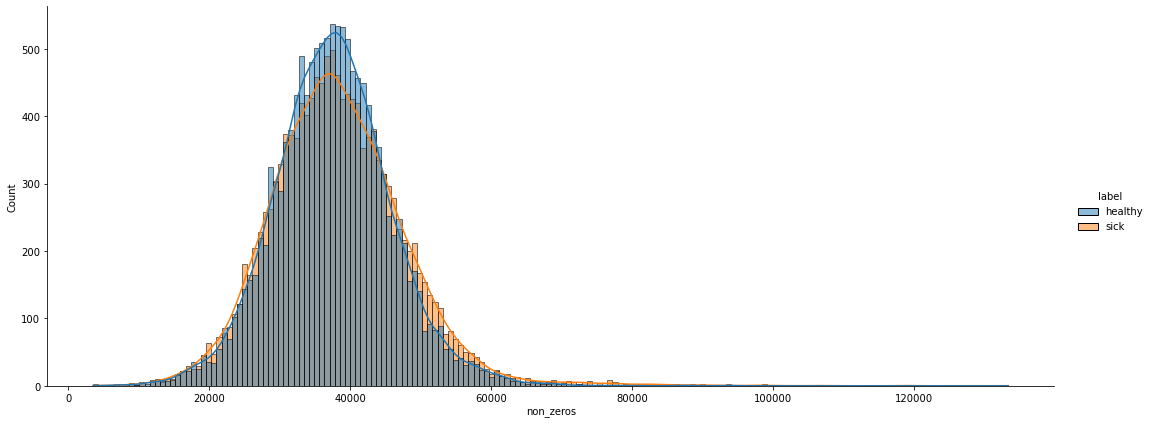

Count pct


,id,zeros,non_zeros,total,pct
count,27558.00000,27558.000000,27558.000000,27558.000000,27558.000000
mean,6889.00000,15601.252667,37906.016438,53507.269105,0.715624
std,3977.72684,7560.853814,8982.949788,14902.714162,0.060740
min,0.00000,2079.000000,3549.000000,6600.000000,0.299655
25%,3444.25000,11326.000000,32134.000000,44202.000000,0.691436
50%,6889.00000,13953.000000,37568.500000,51870.000000,0.729498
75%,10333.75000,17595.000000,43167.000000,60465.000000,0.756013
max,13778.00000,237921.000000,133359.000000,371280.000000,0.862702


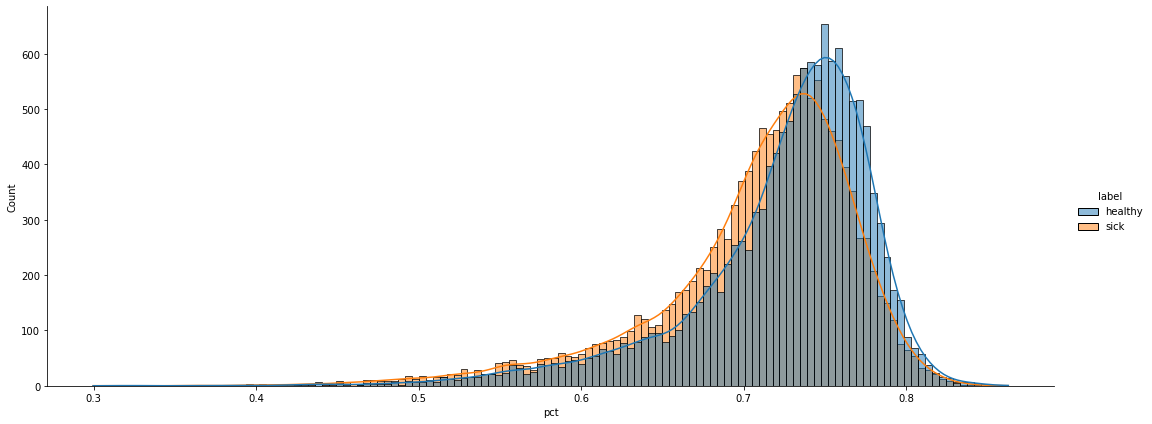

In [14]:
for threshold in np.arange(10, 51, 10):
    plot_pixel_count(df_path_img_healthy, df_path_img_sick, threshold)

* **Notes**:

In [39]:
def plot_pixel_count2(df_path_img_healthy: pd.DataFrame, df_path_img_sick: pd.DataFrame, 
                     threshold_i: float, threshold_f: float, threshold_step: float) -> pd.DataFrame:
    
    df_pixel_count = pd.DataFrame(columns=["id", "zeros", "non_zeros", "total", "label", "threshold"])
    for threshold in np.arange(threshold_i, threshold_f, threshold_step):
        index = int(threshold)
        pixel_count_healthy = pixel_count(df_path_img_healthy, threshold)
        pixel_count_sick = pixel_count(df_path_img_sick, threshold)
        # make dataframe
        df_pixel_count_healthy = pd.DataFrame(pixel_count_healthy, columns=["id", "zeros", "non_zeros", "total"])
        df_pixel_count_healthy["label"] = "healthy"
        df_pixel_count_healthy["threshold"] = threshold
        
        df_pixel_count_sick = pd.DataFrame(pixel_count_sick, columns=["id", "zeros", "non_zeros", "total"])
        df_pixel_count_sick["label"] = "sick"
        df_pixel_count_sick["threshold"] = threshold
        
        df_pixel_count = pd.concat([df_pixel_count, df_pixel_count_healthy], ignore_index = True)
        df_pixel_count = pd.concat([df_pixel_count, df_pixel_count_sick], ignore_index = True)
    return df_pixel_count


In [78]:
df_pixel_count = plot_pixel_count2(df_path_img_healthy, df_path_img_sick, 0,256,50)

100%|██████████| 13779/13779 [00:18<00:00, 747.96it/s]


In [79]:
df_pixel_count["threshold"].unique()

array([0, 50, 100, 150, 200, 250], dtype=object)

In [80]:
df_pixel_count["hue"] = df_pixel_count["threshold"].astype(str) +" "+ df_pixel_count["label"] 

Count non_zeros


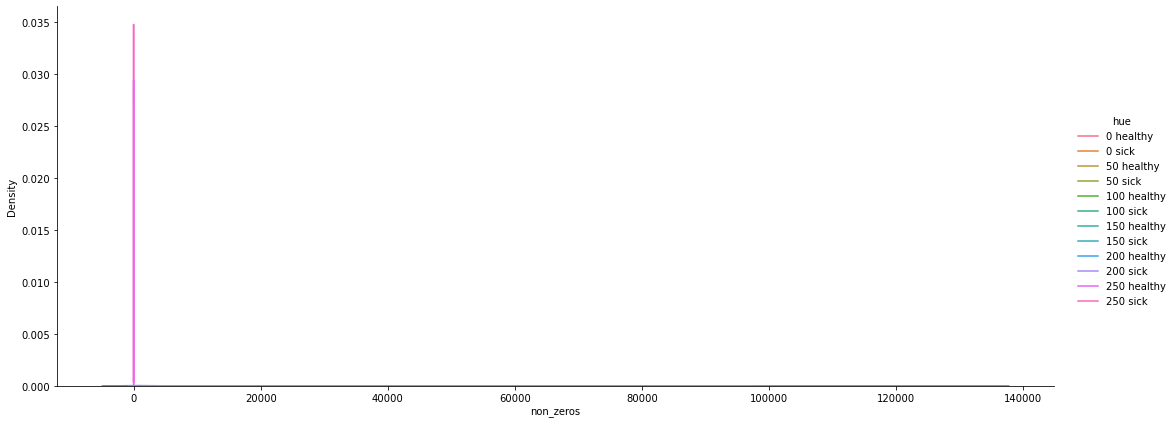

Count pct


,id,zeros,non_zeros,total,pct
count,165348.000000,165348.000000,165348.000000,165348.000000,165348.000000
mean,6889.000000,29103.793871,24403.475234,53507.269105,0.458203
std,3977.666697,19269.059893,17969.124034,14902.488835,0.315300
min,0.000000,2079.000000,0.000000,6600.000000,0.000000
25%,3444.000000,13491.000000,2055.000000,44202.000000,0.040945
50%,6889.000000,21042.000000,29037.000000,51870.000000,0.637039
75%,10334.000000,43680.000000,38775.000000,60465.000000,0.733525
max,13778.000000,371280.000000,133362.000000,371280.000000,0.862702


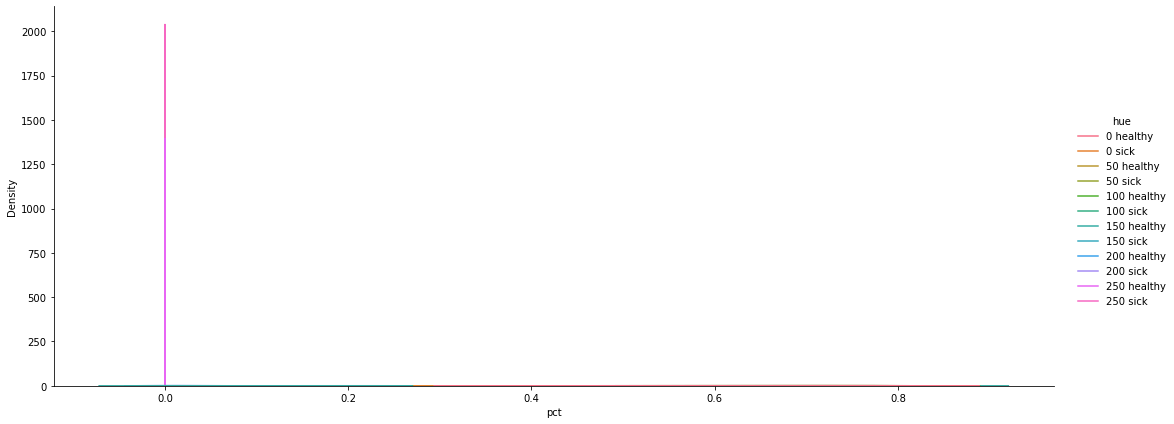

In [83]:
# plot count
print("Count non_zeros")
sns.displot(data = df_pixel_count, x = df_pixel_count["non_zeros"], kind = "kde", hue = "hue", aspect=2.5, height=6)
plt.show()
print("Count pct")
df_pixel_count["pct"] = df_pixel_count["non_zeros"] / df_pixel_count["total"]
display(df_pixel_count.describe())
sns.displot(data = df_pixel_count, x = df_pixel_count["pct"], kind = "kde", hue = "hue", aspect=2.5, height=6)
plt.show()

## Vérification des Nan dans images d'origines

In [96]:
def nan_count(df_path_img: pd.DataFrame) -> pd.DataFrame:
    df_result = pd.DataFrame(columns=["path_img", "nan"])
    
    for i, path_img in enumerate(tqdm(df_path_img.path_img)):
        img_arr = cv2.imread(path_img, flags = IMG_IN_COLOR)

        nan_count = np.isnan(img_arr).sum()
        
        if nan_count!=0:
            df_raw=pd.DataFrame({"path_img":[path_img], "nan":[nan_count]})
            df_result=pd.concat([df_result, df_raw])
            
    return df_result

In [97]:
df_nan_count = nan_count(df_path_img)    

100%|██████████████████████████████████████████████████████████████████████████| 27558/27558 [00:15<00:00, 1785.48it/s]


In [98]:
df_nan_count

,path_img,nan


In [104]:
if not df_nan_count.empty:
    df_nan_count.to_csv(PATH_DATA_EDA + "/" + "df_nan_count.csv", index=False)